#### **Comparison of spectra for TT: theoretical, simulated, point sources, white noise**

In [1]:
import pandas as pd
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

##### **1. Theoretical and simulated spectra**

In [2]:
%store -r data

In [3]:
# We check that the data file columns give Dℓ = ℓ(ℓ+1)Cℓ / 2π in units of μK
data.TT = data.TT/((10**6)**2) # convert to Kelvin
prefactor_Dl = data.L * (data.L + 1) / (2 * np.pi)
cl_TT_teorico = data.TT/prefactor_Dl
data['cl_TT_teorico'] = cl_TT_teorico #add column 

In [4]:
# Because we have no data for L=0,1 we fill it with zeros
null_row_0 = pd.DataFrame({'L':0, 'TT':0,'TE':0,'EE':0,'BB':0,'PP':0, 'cl_TT_teorico':0}, index=[0])
null_row_1 = pd.DataFrame({'L':0, 'TT':0,'TE':0,'EE':0,'BB':0,'PP':0, 'cl_TT_teorico':0}, index=[1])
data = pd.concat([null_row_0,data.loc[:]]).reset_index(drop=True)
data = pd.concat([null_row_1,data.loc[:]]).reset_index(drop=True)

In [5]:
%store -r nside
%store -r fwhm

In [6]:
# Simulated power spectrum
lmax = data.L.iloc[-1]
TT_simulated = hp.synfast(data.cl_TT_teorico, nside = nside, lmax = lmax, fwhm = fwhm) # creates a map from Cl's
cl_TT_simulated = hp.anafast(TT_simulated) # simulated power spectrum from the input simulated TT map

In [7]:
%store cl_TT_simulated

Stored 'cl_TT_simulated' (ndarray)


##### **2. Point source spectra**

In [8]:
%store -r TT_cl 

The power spectrum of the point sources comes from the smoothed map

##### **3. White noise spectra**

In [9]:
%store -r cl_noise_TT_simulated

##### **4. Plot**

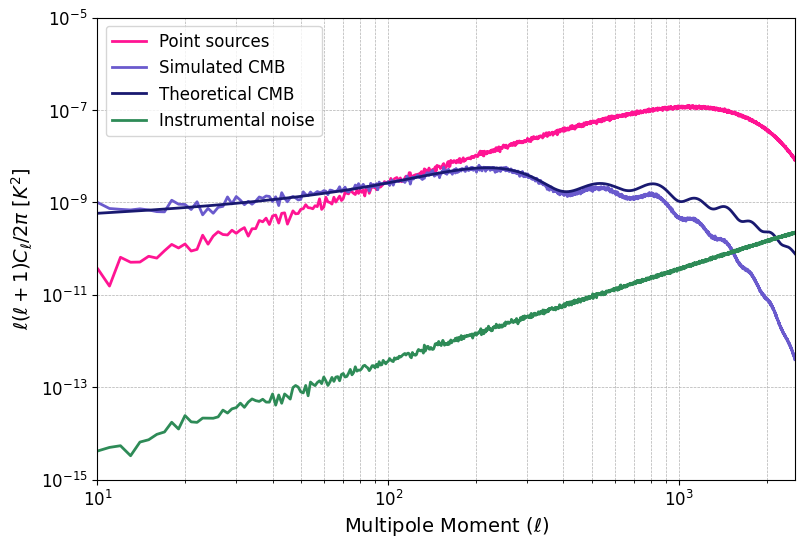

In [10]:
ell = np.arange(len(cl_TT_simulated)) 

plt.figure(figsize=(9, 6))  
# Plot the data
plt.plot(ell, TT_cl * ell * (ell + 1) / (2 * np.pi), label='Point sources', linestyle='-', linewidth=2, color = 'deeppink')
plt.plot(ell, cl_TT_simulated * ell * (ell + 1) / (2 * np.pi), label='Simulated CMB', linestyle='-', linewidth=2, color = 'slateblue')
plt.plot(data.L, cl_TT_teorico * data.L * (data.L + 1) / (2 * np.pi), label='Theoretical CMB', linestyle='-', linewidth=2, c = 'midnightblue')
plt.plot(ell, cl_noise_TT_simulated * ell * (ell + 1) / (2 * np.pi), label='Instrumental noise', linestyle='-', linewidth=2, color = 'seagreen')

plt.ylim([10**-15, 10**-5])
plt.xlim(10, 2500)


plt.xlabel('Multipole Moment ($\ell$)', fontsize=14)
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$' + ' [$K^2$]', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)


plt.xscale('log')
plt.yscale('log')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("TT_plot.jpg", dpi = 150)

plt.show()


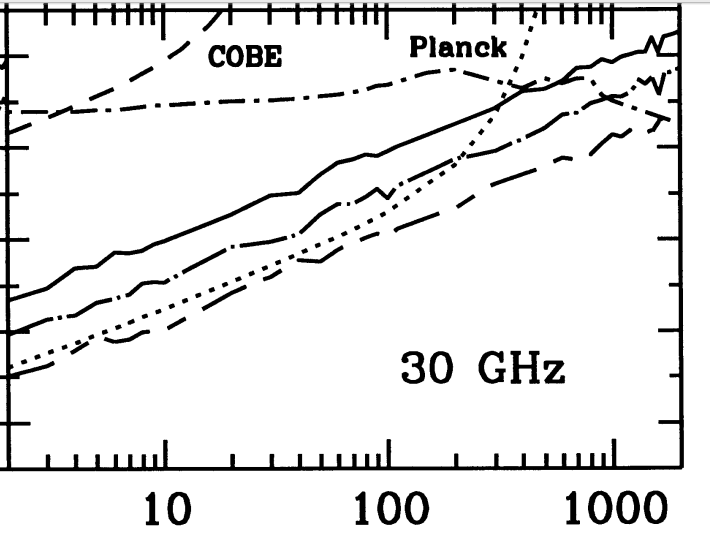

The solid, dot–dashed, and long/short dashed lines correspond to a flux limit for source removal of 1, 0.1, and 0.01 Jy, respectively.